В этом ноутбуке будем изучать понятие векторного простанства и как это понятие связано машинным обучением.

# Вектора

Из Википедии: Ве́кторное (или лине́йное) простра́нство — математическая структура, которая представляет собой набор 
элементов, называемых векторами, для которых определены операции сложения друг с другом и умножения на число — скаляр.

Здесь имеется ссылка на два понятия: вектор и скаляр. Вектора изучаются в курсе школьной геометрии. Статья [в Википедии](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)) определяет вектор как математический объект, который имеет две компоненты: величину и направление. Это классическое определение, но в машинном обучении используется немного другая интерпретация.

Вектором размерности $N$ будем называть последовательность чисел длины $N$: $(a_1, a_2, \ldots, a_N)$. Числа называются координатами вектора. Например, вектора размерности $2$ -- это точки [декартовой плоскости](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D1%8F%D0%BC%D0%BE%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82). Каждая точка на плоскости задается парой ее координат. Вопрос: где же здесь величина и направление? Ответ: точки на плоскости можно интерпретировать как концы векторов, начало которых находится в точке $(0,0)$, а величина -- длины этих векторов.

Из курса школьной геометрии известно, как можно вычислить длину вектора в точке $(x, y)$. Рассматривая координаты как длины катетов прямоугольного треугольника, длину вектора $(x, y)$ можно вычислить как длину гипотенузы: $$L=\sqrt{x^2+y^2}$$


In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

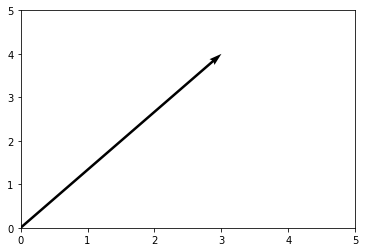

In [27]:
# (0,0) -- начало координат
# (3,4) -- точка конца вектора

plt.quiver(0, 0, 3, 4, angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

In [28]:
# вычисляем длину вектора
x = 3
y = 4
l = np.sqrt(x**2 + y**2)
print(l)

5.0


Можно умножать вектор на число, геометрически это удлинение длины вектора на данное число

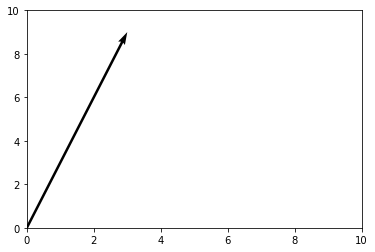

In [30]:
x = 1
y = 3
v = 3
plt.quiver(0, 0, x*v, y*v, angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

Вектора можно складывать покоординатно. Геометрически, сложение векторов -- сложная операция, арифметически это просто сложение соответствующих координат.

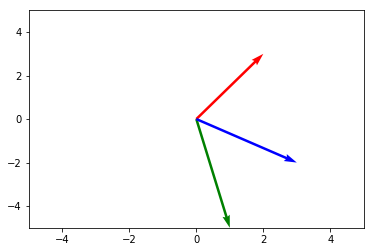

In [34]:
x1 = 2
y1 = 3
x2 = 1
y2 = -5

plt.quiver([0, 0, 0], [0, 0, 0], [x1, x2, x1+x2], [y1, y2, y1+y2], angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Очевидно, что каждая точка декартовой плоскости задает вектор, и наоборот, каждый вектор можно изобразить как точку на декартовой плоскости. Таким образом, декартова плоскость -- это геометрический образ векторного простраства размерности 2. Все, что применимо к векторному простраству размерности 2 работает и для простраства любой размерности. Также точно можно умножать на число, складывать и вычислять длины. Понятно, что для размерности больше 3 геометрические образы не работают, но математические операции точно такие же.

Есть несколько понятий, которые часто упоминают в связи с векторным пространством. Рассмотрим их.

### Линейные комбинации и линейная зависимость векторов

Линейной комбинацией векторов $a_1, a_2, \ldots, a_n$ называется выражение вида $x_1a_1, x_2a_2, \ldots, x_na_n$, где $x_1, x_2, \ldos, x_n$ -- некоторые числа (коэффициенты). Иначе говоря, линейная комбинация векторов -- это просто сумма их произведений на некоторые числа. Ранее мы видели, что при умножении вектора на число снова получается вектор (с тем же направлением, но другой длиной), также и при сложении векторов снова получается вектор. Иначе говоря, линейная комбинаци векторов снова задает вектор. Вырожденный случай это тривиальная линейная комбинация, когда все числа $x_1, x_2, \ldots, x_n$ равны нулю, поэтому и все координаты векторов $a_1, a_2, \ldots, a_n$ также равны нулю, значит в результате получается нулевой вектор. Если хотя бы один из коэффициентов не равен нулю, то комбинация называется нетривиальной.

Совокупность векторов $a_1, a_2, \ldots, a_n$ будем называть линейно независимой, если не существует нетривиальной линейной комбинации этих векторов, равной нулевому вектору. В противном случае, будем называть такую совокупность линейно зависимой.

С понятием линейной зависимости тесно связано понятие размерности. Например, в прострастве размерности 2 каждый вектор задается двумя числами (координатами) и любая совокупность векторов размером три и более является линейно зависимой. Например, совокупность $(1,2), (2,3), (3,5)$ линейно зависима, достаточно взять в качестве коэффициентов числа $(1, 1, -1)$. Тогда получим линейную комбинацию $1*(1,2) + 1*(2,3) + -1*(3,5)$ = $(1,2) + (2,3) + (-3,-5)$ = $(0,0)$. С другой стороны, два вектора в двухмерном пространстве линейно зависимы только тогда, когда они колинеарны, т.е. имеют одно и тоже направление (может быть, со знаком минус).

Также, для трехмерного пространства любая комбинация любая совокупность четырех и более векторов линейно зависима. И вообще, для пространства размерности $n$ любая совокупность векторов размером $n+1$ и более является линейно зависимой.

Вопрос в том, существуют или нет линейно независимые совокумности векторов. Ответ положительный, существуют. Например, в декартовой плоскости это два вектора: $(0,1)$ и $(1,0)$. Эти вектора перпендикулярны (ортогональны) друг другу и имеют единичную длину. Вообще говоря, любые два вектора на плоскости, которые не совпадают по направлению, являются линейно независимыми. Но, для нас здесь интересны координаты и взаимная ортогональность. Любой вектор на плоскости можно выразить через линейную комбинацию этих двух вектором. Например, вектор $(14, -8)$ выражается такой линейной комбинацией: $14*(1,0) + -8*(0,1)$. Про такие вектора говорят, что они образуют базис данного векторного пространства, в данном случае это еще и ортогональный базис. Координаты любого вектора на плоскости выражаются в доле длин векторов базиса.

### Норма вектора и скалярное произведение

Выше мы рассматривали понятие длины вектора на плоскости: $L=\sqrt{x^2+y^2}$. Это понятие можно обобщить на случай пространства размерности $N$. В таком случае длина вектора будет называться *нормой*. Пусть имеется вектор $V = (x_1, x_2, \ldots, x_n)$, определим норму $|V|$ вектора $V$ следующим образом:
$$|V| = \sqrt{x_1^2 + x_2^2 + \ldots, x_n^2}$$

Пусть имеются два вектора: $x=(x_1, x_2, \ldots, x_n)$ и $y = (y_1, y_2, \ldots, y_n)$, определим их скалярное произведение $x\cdot y$ следующим образом:
$$x\cdot y = x_1*y_1 + x_2*y_2 + \ldots + x_n*y_n$$

Иначе говоря, скалярное произведение двух векторов это сумма произведений их координат. Результатом скалярного произведения является число (как сумма произведение чисел). В англоязычной литературе, скалярное произведение обозначается через *dot product*. Операция numpy.dot используется для вычисления скалярного произведение двух или даже более векторов (вектора передаются в списке).

На плоскости угол между двумя векторами можно измерить, численное значение этой меры можно задать синусом или косинусом этого угла. Использовать синус или косинус удобно, потому что их значением является число, а не градусы, которые используются для измерения угла. Угол между двумя векторам на плоскости можно понимать как меру сонаправленности векторов. Чем ближе по направлению вектора друг у другу, тем угол между ними меньше. Хотелось бы обобщить поняти угла между векторами и на случаи простанств большей размерности, чтобы определить понятие их сонаправленности даже в том случае, когда с простанствов нельзя ассоциировать геометрический образ. В качестве численной меры угла между векторами обычно используют косинус, т.к. он естественным образом выражает близость. Если вектора ортогональны, то косинус угла между ними равен нуля, если вектора коллинеарны (имеют одно и то же направление), то косинус угла между ними равен единице. Определим косинус угла между векторами пространства размерности $n$:
$$cos(x,y) = \frac{x\cdot y}{|x|*|y|}$$

Таким образом, косинус угла между векторами $x$ и $y$ задается как отношение скалярного произведение этих векторов к произведению их норм. Неообходимо проверить, действительно ли это абстрактное математическое определение отражает наше интуитивное представление об угле между векторами? Давайте проверим.

Вычислим косинус угла между ортогональными векторами $(1,0)$ и $(0,1)$:
$$cos((1,0), (0,1)) = \frac{1*0 + 0*1}{\sqrt{1^2 + 0^2} * \sqrt{0^2 + 1^2}} = \frac{0}{2} = 0$$

Рассмотрим коллинеарные вектора $(1,3$ и $(3, 9)$. Вычислим их скалярное произведение:
$$cos((1,3), (3,9)) = \frac{1*3 + 3*9}{\sqrt{1^2 + 3^2} * \sqrt{3^2 + 9^2}} = \frac{30}{\sqrt{10}*\sqrt{90}}= \frac{30}{\sqrt{900}} = 1$$

Пусть вектора задаются списками языка Python, определите функцию вычисления косинуса угла между векторами

In [47]:
def cosine(x, y):
    pass

x = [1, 0, 0, 0, 0]
y = [0, 1, 0, 0, 0]
print(cosine(x,y))

x = [1, 2, 2, 3, 4]
y = [2, 4, 4, 6, 8]
print(cosine(x,y))

None
None


Задайте вектора как массивы numpy и используйте numpy.dot и np.linalg.norm для вычисления косинуса между векторами.

In [49]:
import numpy as np

def cosine1(x, y):
    pass

x = [1, 0, 0, 0, 0]
y = [0, 1, 0, 0, 0]
print(cosine1(x,y))

x = [1, 2, 2, 3, 4]
y = [2, 4, 4, 6, 8]
print(cosine1(x,y))

None
None


В машинном обучении, векторные пространства используются как основная абстракция. Совокупность обрабатываемых данных, для которой необходимо построить предсказательную модель, обычно задается векторами чисел. Каждый вектор представляет пример для обучения модели, а элементы этого вектора называются признаками (features). Таким образом, примеры для обучения можно представлять в виде точек векторного пространства. Различные алгоритмы машинного обучения стараются построить геометрическую модель, которая отражает распределение примеров в векторном прострастве и, таким образом, позволяет предсказывать для нового примера его местоположение в этом пространстве.

Рассмотрим в качестве примера реализацию алгоритма сравнения двух текстовых документов на основе модели *мешка слов (bag of words)*. Эта модель рассматривает текстовый документа как множество слов, где каждому слову дана в соответствие частота его встречаемости в данном документе. Например, пусть имеется документ следующего вида:
> мама мыла раму мама помыла раму папа не мыл раму

В этом документе имеются следующие слова: мама, мыла, раму, помыла, папа, не, мыл. Частоты слова распределяются следующим образом: (мама, 2), (мыла, 1), (раму, 3), (помыла, 1), (папа, 1), (не, 1), (мыл, 1).

Данную совокуменость слов вместе с их частотами можно рассматривать как вектор, где в качестве координат выступают частоты слов. Косинус угла между такими векторами двух документов отражает их схожесть. Если тексты документов совпадают, то косинус угла между векторами их моделей мешков слов равен единице, чем меньше в документах одних и тех же слов, тем более их различие. В пределе эначение косинуса может быть равно -1, но на практике такое случается не часто.

Задача: реализовать функцию, вычисляющую косинусную меру схожести двух документов. В качестве входных параметров функции передаются тексты документов. Функция выделяет слова из документов и считает их частоты. После этого вычисляет косинус угла между векторами частот данных документов. Для разделения на слова предлагается использовать метод string.split(' '), вектора слов задавать с помощью Python dict, где в качестве ключей выступают слова, а в качестве значений -- их частоты.

In [50]:
def cosine_docs(x, y):
    pass


x = 'мама мыла раму мама помыла раму папа не мыл раму'
y = 'мама мыла раму мама помыла раму папа не мыл раму мама мыла раму мама помыла раму папа не мыл раму'
print(cosine_docs(x, y))

y = 'мама мыла раму'
print(cosine_docs(x, y))

y = 'никто ничего не мыл'
print(cosine_docs(x, y))

None
None
None
